# Eigenstates search 1-D quantum harmonic oscillator

In [1]:
using Pkg;
Pkg.activate("../../.");
using SchrodingerEquationSolver
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver_examples`


In [2]:
# Space grid definition and creation
r_min::Float64=-12.0; #Where the space grid starts.
r_max::Float64=12.0; #Where the space grid ends.
N=40000; #Number of points in the space grind.
grid_stru= Grids.init_uniform_grid_structure(r_min, r_max, N); #Grid creation, grid is the list with the grid points.

### Quantum gausian well potential 
$v_{0}$: Magnitud of the potential.\

$v_0 * e^{-ax^2}$

In [3]:
v0::Float64=-20.0;

v_effe= Potentials.gaussian_potential(v0,grid_stru.grid); #the list with the gaussian potential

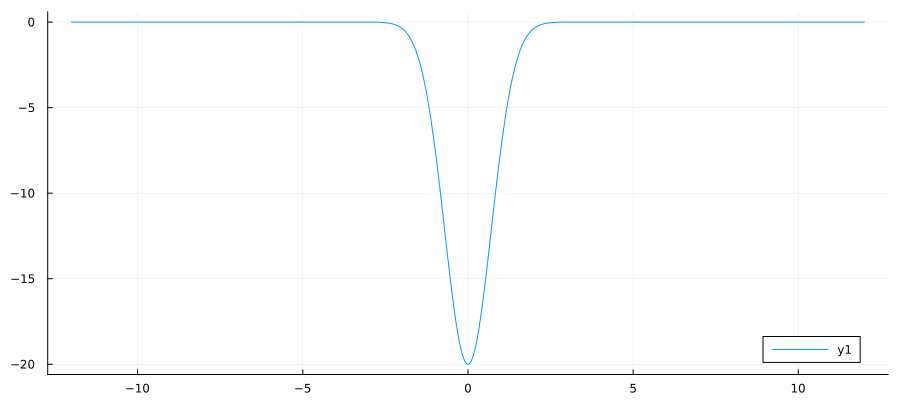

In [4]:
plot!(grid_stru.grid, v_effe)
plot!(size=(900,400))

In [4]:
#Energy grid definition and creation. The system searches the energy grid for potential 
#values for the eigenvalues of the Schrodinger equation 
E_max::Float64=-0.05; #Maximal energy in the energy grid.
E_min::Float64=-19.98; #Minimal energy in the energy grid.
E_N::Int64=400; #Number of points in the energy grid.
E_grid= Grids.uniform_grid(E_min, E_max, E_N); #List with the energy grid points.

In [5]:
#Search the energy grid, for intervals with promising eigenvalues, the fictitious_intervals, holds intervals
#resulting from matching forward and backward integrations.

#E_intervals, merge_ratio_of_E= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid_stru,
#                                                                        InitialConditions.harmoic_oscillator_1D,
#                                                                        OneDSchrodingerEquationSolver.solver_uniform_grid);

E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid_stru,
    InitialConditions.harmoic_oscillator_1D,
    OneDSchrodingerEquationSolver.solver_uniform_grid);

In [6]:
E_intervals

5-element Vector{Tuple{Float64, Float64}}:
 (-17.03295739348371, -16.98300751879699)
 (-11.488521303258146, -11.438571428571429)
 (-6.843182957393484, -6.793233082706767)
 (-3.146892230576441, -3.0969423558897233)
 (-0.6493984962406003, -0.5994486215538863)

In [7]:
numb_solu::Int64= size(E_intervals)[1]; #Number of potential solutions in the energy grid.
eigen_list::Vector{Float64}=zeros(numb_solu); #Initializing the list that is going to hold the energy eigenvalues.
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu]; #Initializing the list that holds the eigenfunctions list.

In [8]:
#Using Illinois algorithm to find the actual energy eigenvalue and eigenfunction for everyone of the energy intervals.
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, 
    grid_stru,InitialConditions.harmoic_oscillator_1D, 
    OneDSchrodingerEquationSolver.solver_uniform_grid);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

In [9]:
#Printing the energies
eigen_list

5-element Vector{Float64}:
 -17.026230533749466
 -11.485225114278514
  -6.804029598897587
  -3.1070408688730344
  -0.636664746462429

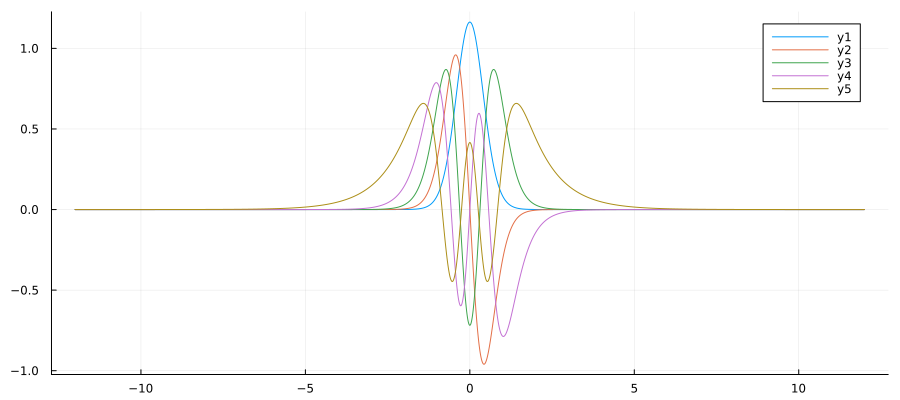

In [10]:
#Plot of the wave functions
plot!(grid_stru.grid, u_wave_functions)
plot!(size=(900,400))